# Imports

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools
import copy

# Shooting method

We are going to solve the problem proposed in the slides, which is slightly easier than the one covered in class.\
The ball is thrown upward from an initial height y(t=0)=0 m, and needs to be at a height of 10 m after 3 s, y(t=3)=10 m.\
We are asked to find the necessary initial velocity.

In [11]:
g_grav = 9.81

def projectile(y, t):
    return np.array([y[1], -g_grav])

In [3]:
def plot_trajectory(yi, vi, ti, tf, target_yf=None):

    ts = np.linspace(ti,tf)
    ys = scipy.integrate.odeint(projectile,np.array([yi,vi]),ts)

    if(target_yf is not None):
        plt.axhline(target_yf, lw=0.7, c="k", dashes=[3,3])  
    
    print("yf=",ys[-1,0])

    plt.plot(ts, ys[:,0], label="y(t) [m]")
    plt.plot(ts, ys[:,1], label="v(t) [m/s]")
    
    plt.legend(frameon=False)
    plt.xlabel("t [s]")
    plt.xlim([ts[0],ts[-1]])
    plt.show()

yf= -29.145000000501


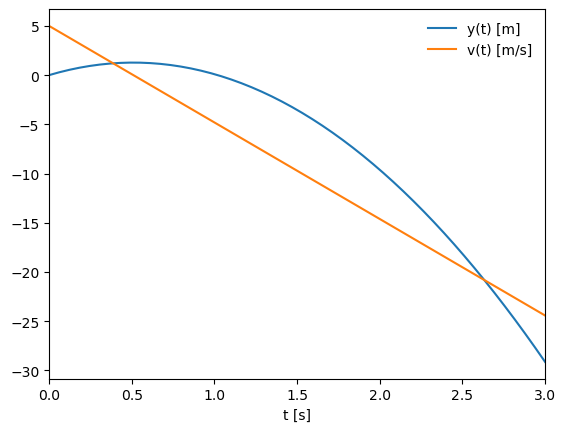

In [4]:
plot_trajectory(yi=0., vi=5., ti=0., tf=3.)

Now that we have a set of functions that work, we can start shooting for the correct initial conditions.\
First order of business is to braket our solution. We can do an very coarse grid search to find a suitable braket.

v0 = 0  -> yf = -44.14500000040266
v0 = 10  -> yf = -14.145000000398568
v0 = 20  -> yf = 15.854999999780787


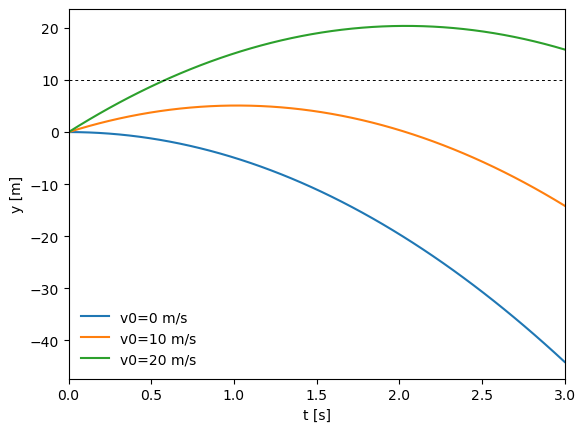

In [5]:
ts = np.linspace(0,3)

for v0 in [0, 10, 20]:
    ys = scipy.integrate.odeint(projectile,np.array([0,v0]),ts)
    print("v0 =", v0, " -> yf =", ys[-1,0])
    plt.plot(ts, ys[:,0], label="v0="+str(v0)+" m/s")
    
plt.axhline(10, lw=0.7, c="k", dashes=[3,3])    

plt.legend(frameon=False)
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.xlim([ts[0],ts[-1]])
plt.show()

Thus, we infer that $v0 \in [0, 20]$ braket our solution (indeed, even [10, 20] would have), . We can refine our search there.

In [6]:
def get_y(v0, tf, yf):
    ts = np.linspace(0,tf,2)
    ys = scipy.integrate.odeint(projectile,np.array([0,v0]),ts)
    return ys[-1,0] - yf

Any root finder is fair game. A good one provided in scipy.optimize is ridder.
You can use one of the ones explained in class instead.

In [12]:
target_vi = scipy.optimize.ridder(get_y, 0, 20, args=(3, 10))
print("target_vi=", target_vi)

target_vi= 18.04833333348188


If scipy.optimize.ridder did not accept an optional argument with the "args" to be passed to the function, we could implement a workaround

In [13]:
def get_y_at_tf(tf, yf):
    def get_y(v0):
        ts = np.linspace(0,tf,2)
        ys = scipy.integrate.odeint(projectile,np.array([0,v0]),ts)
        return ys[-1,0] - yf
    return get_y

In [14]:
scipy.optimize.ridder(get_y_at_tf(tf=3, yf=10), 0, 20)

18.04833333348188

Either way, we now have the desired initial conditions

yf= 10.000000000198966


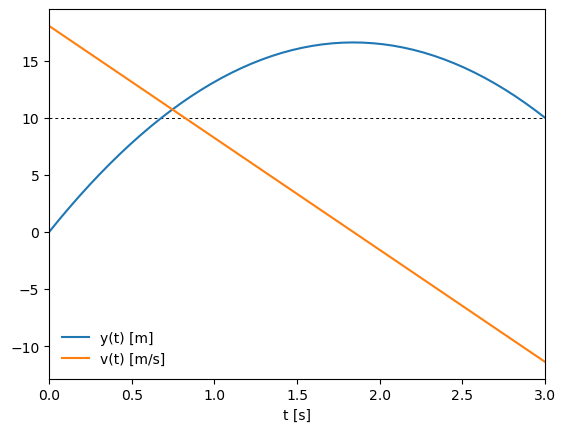

In [15]:
plot_trajectory(yi=0., vi=target_vi, ti=0., tf=3., target_yf=10.)

Bullseye